# Exercises 7

In exercises 5 and 6 we tried to segment the lights in the rocket image using thresholds and binary operations. We are now going to try to find them by template matching.

- import the rocket image
- convert it to gray scale
- try to manually crop a small region around one of the lights (choose limits, plot the region and adjust)
- use that region as template to match over the full image
- find local maxima in the matched image
- plot them on top of the image
- plot the pixel values at the positions of the maxima
- can you subselect only those corresponding to ligths
- are some of the lights missing ? Why ? Can we fix it ?


# Solutions 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data

In [3]:
#load moon image
image = skimage.data.rocket()

In [99]:
#convert to gray scale
image_gray = skimage.color.rgb2gray(image)

In [100]:
plt.gray()

<Figure size 432x288 with 0 Axes>

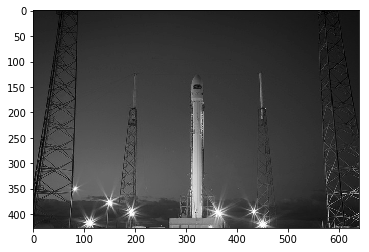

In [101]:
plt.imshow(image_gray)
plt.show()

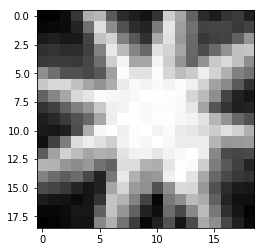

In [102]:
#crop around a light
image_crop = image_gray[368:387,141:160]
plt.imshow(image_crop)
plt.show()

In [108]:
from skimage.feature import match_template, peak_local_max

In [110]:
#do the template matching
matched = match_template(template=image_crop, image=image_gray, pad_input=True, mode='mean')

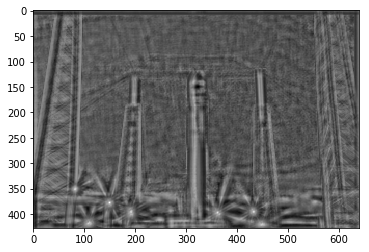

In [112]:
plt.imshow(matched)
plt.show()

In [113]:
#find local maxima
local_max = peak_local_max(matched,threshold_abs=0.5, min_distance=10, indices=False)
local_max_ind = peak_local_max(matched,threshold_abs=0.5, min_distance=10, indices=True)

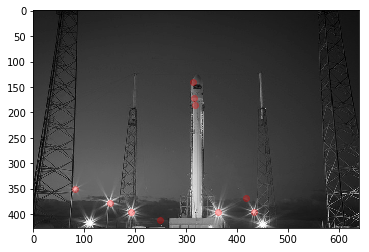

In [114]:
#plot to maxima on the image
plt.imshow(image_gray)
plt.plot(local_max_ind[:,1],local_max_ind[:,0],'ro',alpha = 0.3)
plt.show()

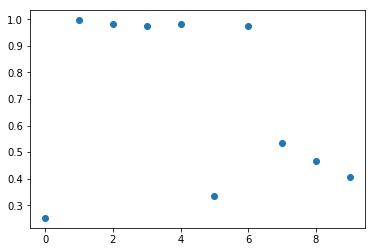

In [116]:
plt.plot(image_gray[local_max_ind[:,0],local_max_ind[:,1]],'o')
plt.show()

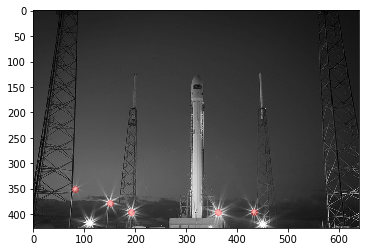

In [117]:
#make subselection based on the plot above
intensities = image_gray[local_max_ind[:,0],local_max_ind[:,1]]
local_max_ind = local_max_ind[intensities>0.8,:]

plt.imshow(image_gray)
plt.plot(local_max_ind[:,1],local_max_ind[:,0],'ro',alpha = 0.3)
plt.show()

We are missing the two lights at the bottom of the image. This is because they are very close to the image adge and the matching is not complete. We can try to extend the image by padding it with a few rows:

In [118]:
image_gray = np.pad(image_gray,((0,10),(0,0)),mode='mean')

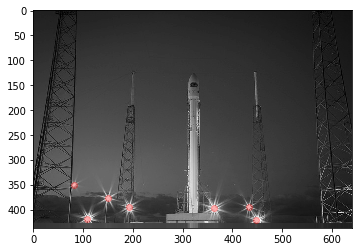

In [120]:
matched = match_template(template=image_crop, image=image_gray, pad_input=True, mode='mean')
local_max_ind = peak_local_max(matched,threshold_abs=0.5, min_distance=10, indices=True)
intensities = image_gray[local_max_ind[:,0],local_max_ind[:,1]]
local_max_ind = local_max_ind[intensities>0.8,:]

plt.imshow(image_gray)
plt.plot(local_max_ind[:,1],local_max_ind[:,0],'ro',alpha = 0.3)
plt.show()